# Binary Classification with Logistic Regression

In this module, you will learn how to perform binary classification in scikit-learn with logistic regression. We will take a look at the iris dataset, which is a classic for testing out classification algorithms. Finally, we will use the accuracy score for evaluating how good the model we create really is.

<b>Functions and attributes in this lecture: </b>
- `pandas:` - Pandas package with alias `pd`
  - `.value_counts()` - Get the value distribution for the pandas series
  - `.corr()` - Get the correlation matrix for a pandas dataframe
- `sklearn.linear_model` - Submodule for linear models
  - `LogisticRegression()` - The logistic regression model
    - `.fit()` - Training the model on the data
    - `.predict()` - Predicting on new data using the model
    - `.predict_proba()` - Get the precentages for prediction on new data using the model
- `sklearn.metrics` - Submodule for metrics used to evaluate models
  - `accuracy_score()` - Finding the accuracy score for a set of predictions
- `sklearn.datasets` - Submodule of sklearn for toy datasets
  - `load_iris()` - A function for loading the iris dataset

In [29]:
# Non-sklearn packages
import numpy as np
import pandas as pd

# Sklearn modules & functions
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Working with the Iris Dataset

Let us begin by importing the iris dataset and checking it out!

In [30]:
# Loading the Iris dataset
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

# Some info about the dataset
print(datasets.load_iris()["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [31]:
# Describe the features
X.describe()

# Get statistical summary of the features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
# Check out the datatypes of the features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [33]:
# Checking the values that the output can take
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [34]:
# Selecting only the first two classes
X = X[50:]
y = y[50:] - 1

In [35]:
# Collect all the variables
all_variables = pd.concat([X, y], axis=1)

In [36]:
# Checking the correlation
all_variables.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,0.553855,0.828479,0.593709,0.494305
sepal width (cm),0.553855,1.000000,0.519802,0.566203,0.308080
petal length (cm),0.828479,0.519802,1.000000,0.823348,0.786424
petal width (cm),0.593709,0.566203,0.823348,1.000000,0.828129
target,0.494305,0.308080,0.786424,0.828129,1.000000


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

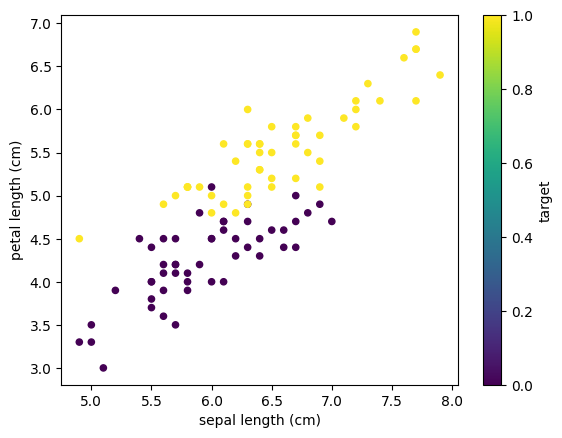

In [ ]:
# A small visualization
all_variables.plot.scatter(
    x="sepal length (cm)", y="petal length (cm)", c="target", colormap="viridis"
)

## Logistic Regression

We will now train a logistic regression model for binary classification of the iris flower.

In [ ]:
# Dividing up into training sets amd testigns sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [44]:
# Checking the shape of the data
X_train.shape

(67, 4)

In [45]:
# Importing the logictic regression classifier
from sklearn.linear_model import LogisticRegression

In [46]:
# Initiating a logistic regression instance
log_reg = LogisticRegression()

In [51]:
# Fit the logistic regression on the train data
log_reg.fit(X_train.values, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Predict a single new instance
new_flower = [[6.5, 2.8, 7.1, 1.5]]
log_reg.predict(new_flower)

array([1])

In [53]:
# can also predict the probability for each class
log_reg.predict_proba(new_flower)

array([[0.00410586, 0.99589414]])

## Evaluating the Model

Finally, we will evaluate how well our model performed using the accuracy score metric.

In [56]:
# Predict the labels
y_pred = log_reg.predict(X_test.values)

In [58]:
# Finding the Accuracy Score
accuracy = sum(y_pred == y_test) / len(y_test)
accuracy

0.9393939393939394

In [59]:
# Use the accuracy score function
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9393939393939394